In [1]:
import matplotlib.pyplot as plt
import datetime as dt
import os
import pandas as pd
os.chdir('k:/a/data')

In [2]:
var=locals()
for i in os.listdir():
    var[i.split('.')[0].replace('-','_')]=pd.read_csv(i)
    var[i.split('.')[0].replace('-','_')]['graph type']=i.split('-')[-1].replace('.csv','')
    cols=var[i.split('.')[0].replace('-','_')].columns.tolist()
    var[i.split('.')[0].replace('-','_')].columns=['report date']+cols[1:]
    

pd.concat([var[i.split('.')[0].replace('-','_')] for i in os.listdir()]).to_csv('grand-graph-corona.csv',index=False)

In [3]:
target=['Algeria', 'Australia', 'Brazil', 'Canada', 'Chile', 'China', 'Europe', 'France', 'Iran', 'Italy', 'New Zealand', 'Republic of Korea', 'South Africa', 'Spain', 'United States of America', 'Turkey', 'Israel', 'Africa', 'LAC']

In [4]:
#single plot for in sample data
def plot_in_sample(data,actualcol,fittedcol,title,
                   fig,order,color1,color2,color3):    
    
    ax=fig.add_subplot(order)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.title(data['country'].iloc[0]+'\n'+title)
    plt.ylabel('number')
    plt.xlabel('date')
    
    dd=data.dropna()
    
    dd[actualcol][dd['graph type']=='poisson'].plot(label='Actual',
                                                        alpha=0.9,c=color1)
    dd[fittedcol][dd['graph type']=='poisson'].plot(label='ER Fitted',
                                                        alpha=0.9,c=color2)
    dd[fittedcol][dd['graph type']=='powerlaw'].plot(label='BA Fitted',
                                                         alpha=0.9,c=color3)
    
    plt.legend(loc=0)

In [5]:
#plot S,I,D in a 2 by 2 figure for in sample data
def plot_all(data,savefig=False):

    fig=plt.figure(figsize=(12,8))

    
    iteration=[('susceptible','susceptible fitted',
                        'Susceptible Population',221,
                        '#1f6521','#d6ce15','#87c735'),
                       ('currently infected','infected fitted',
                        'Currently Infected',222,
                        '#f13c20','#f79e02','#FCADE1'),
                       ('Total deaths','death fitted',
                        'Virus-caused Death',223,
                        '#4d6d9a','#99ced3','#18BEA9')]
    for i in iteration:           
        actualcol,fittedcol,title,order,color1,color2,color3=i
        plot_in_sample(data,actualcol,fittedcol,title,
                           fig,order,color1,color2,color3)
    
    #plot the forecast of S,I,D
    ax=fig.add_subplot(224)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.title(data['country'].iloc[0]+'\n'+'Forecast')
    plt.ylabel('number')
    plt.xlabel('date')
    
    
    for i in iteration:
        col=i[1]
        color1=i[5]
        color2=i[6]
        
        data[col][data['graph type']=='poisson'].plot(
            label='ER '+col.replace(' fitted',''),alpha=0.7,color=color1)
        data[col][data['graph type']=='powerlaw'].plot(
            label='BA '+col.replace(' fitted',''),alpha=0.7,color=color2)
    
    plt.legend(loc=0)    
    
    #avoid messed up title and xlabel 
    plt.tight_layout(pad=1.5)
    
    if savefig:
        figname=f"graph-corona-{data['country'].iloc[0]}.png"
        plt.savefig(figname.lower())
    
    plt.show()

&nbsp;
### Viz
&nbsp;

In [6]:
df=pd.read_csv('grand-graph-corona.csv')
df.set_index('report date',inplace=True)
df.index=pd.to_datetime(df.index)

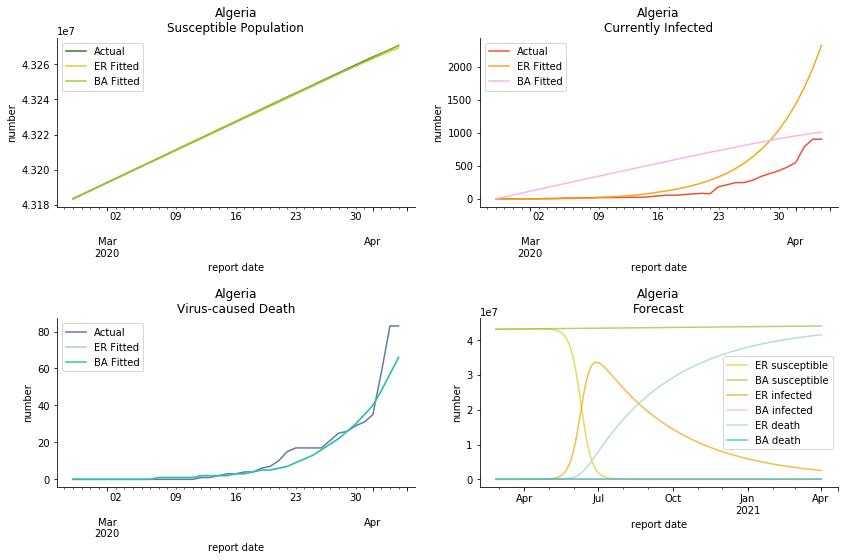

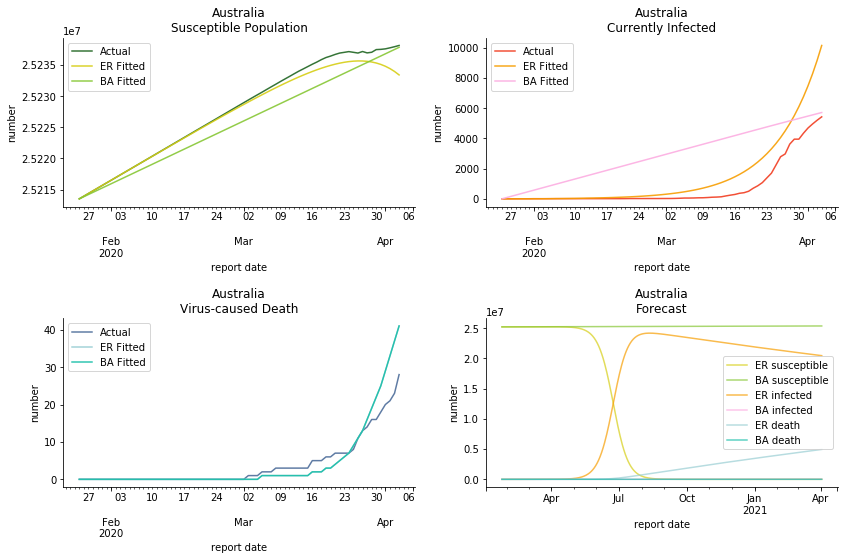

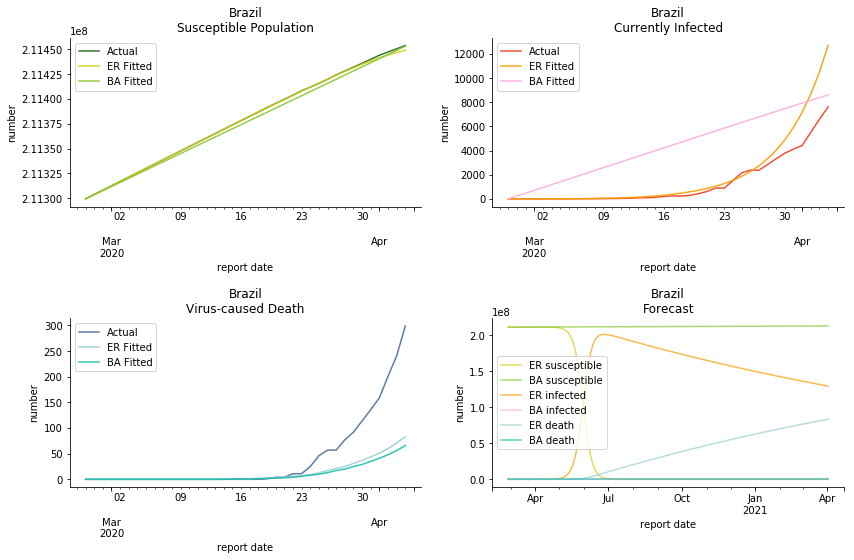

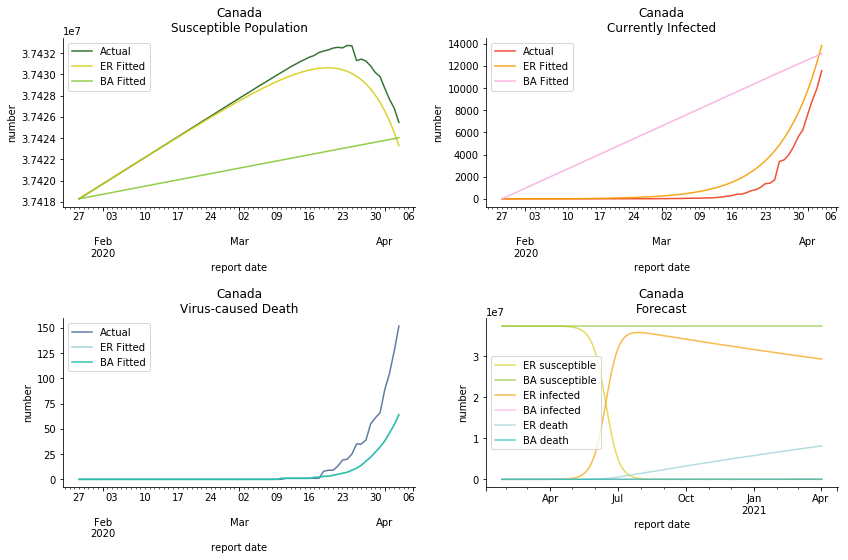

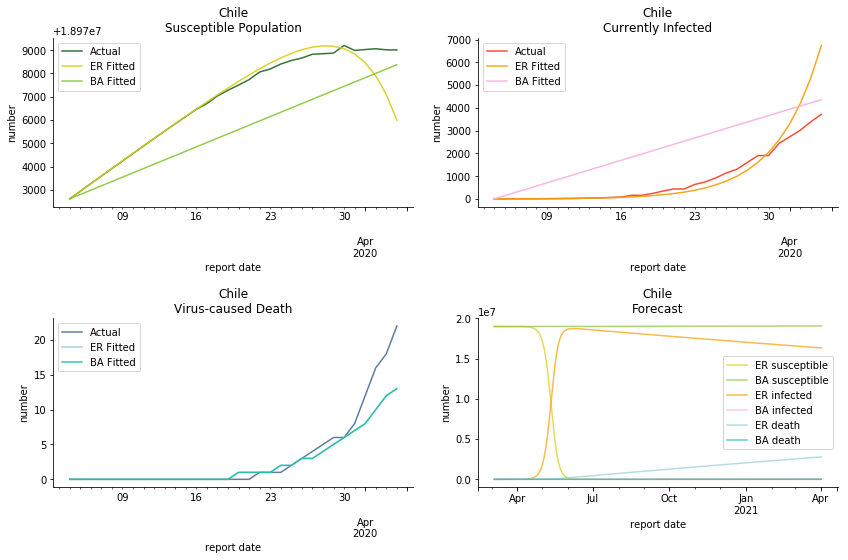

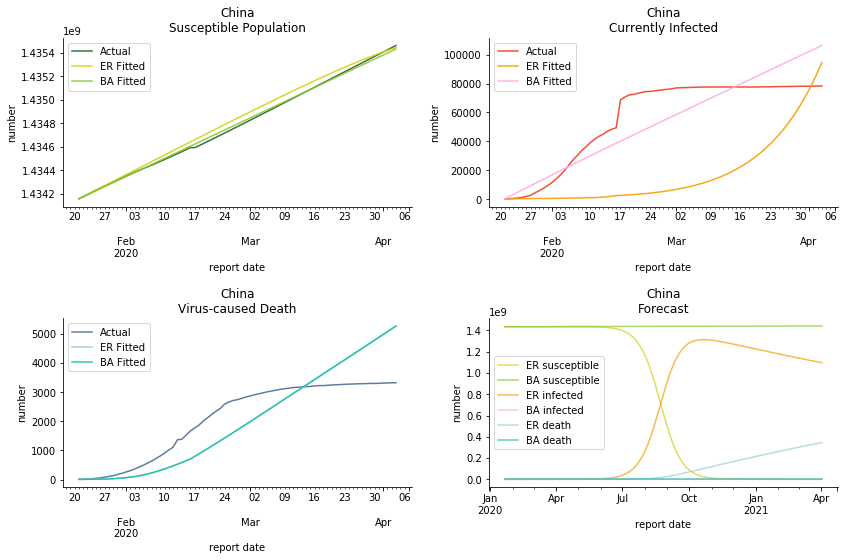

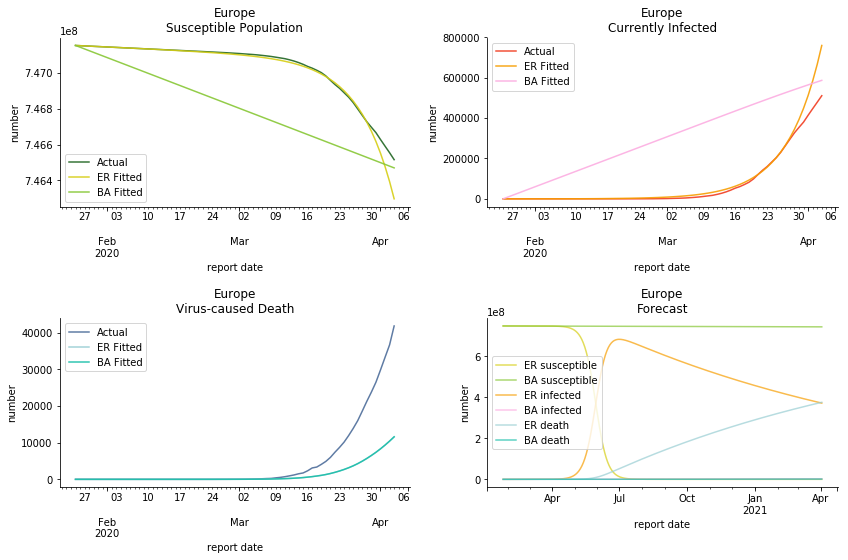

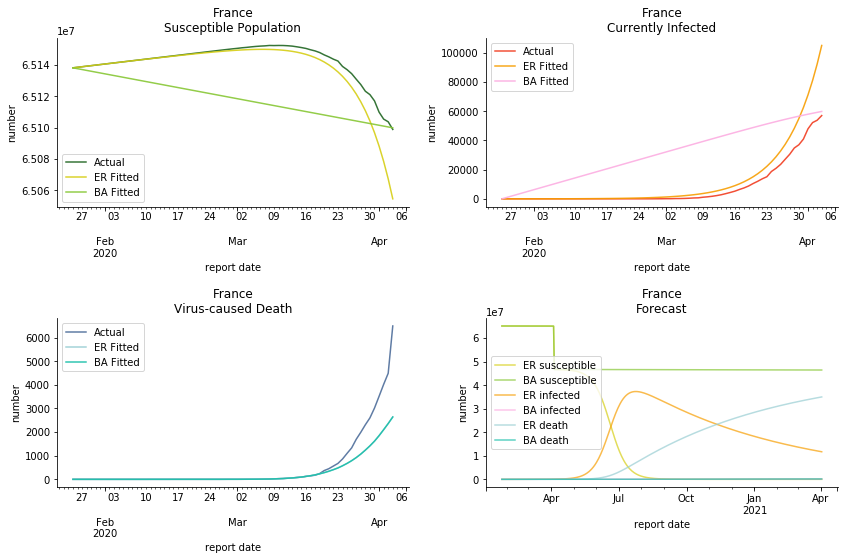

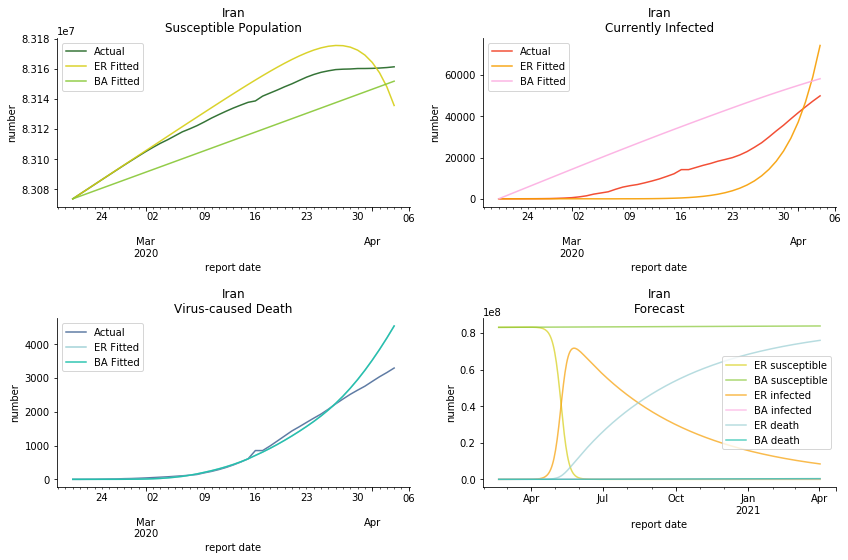

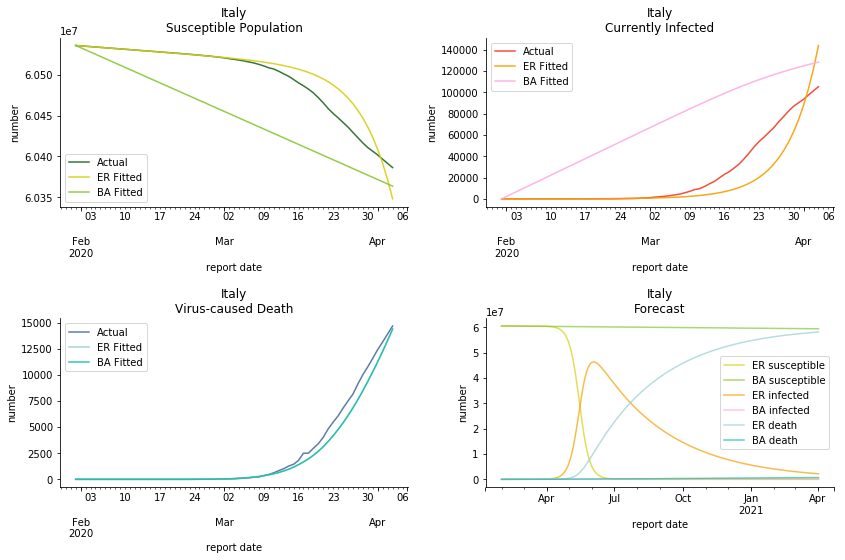

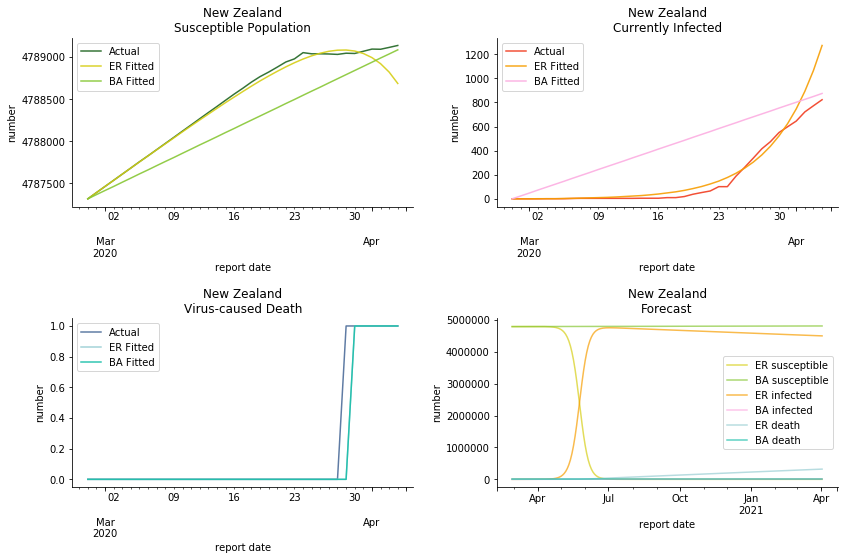

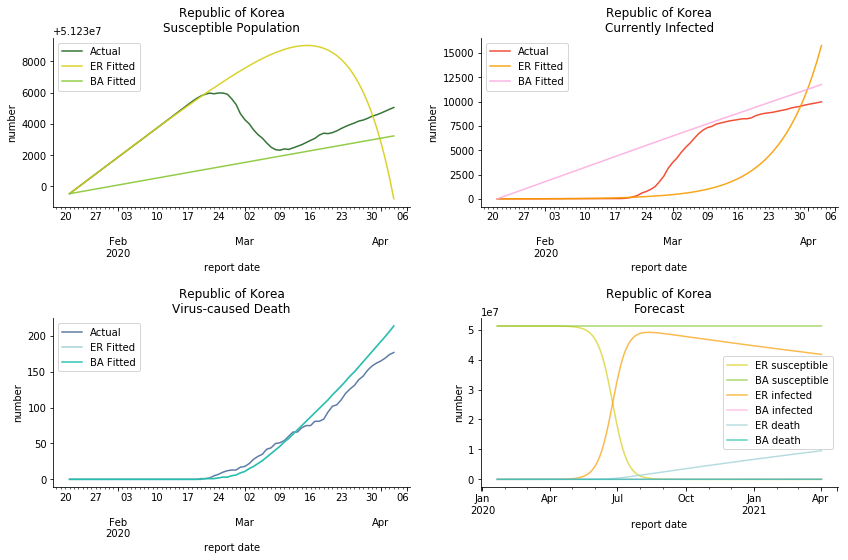

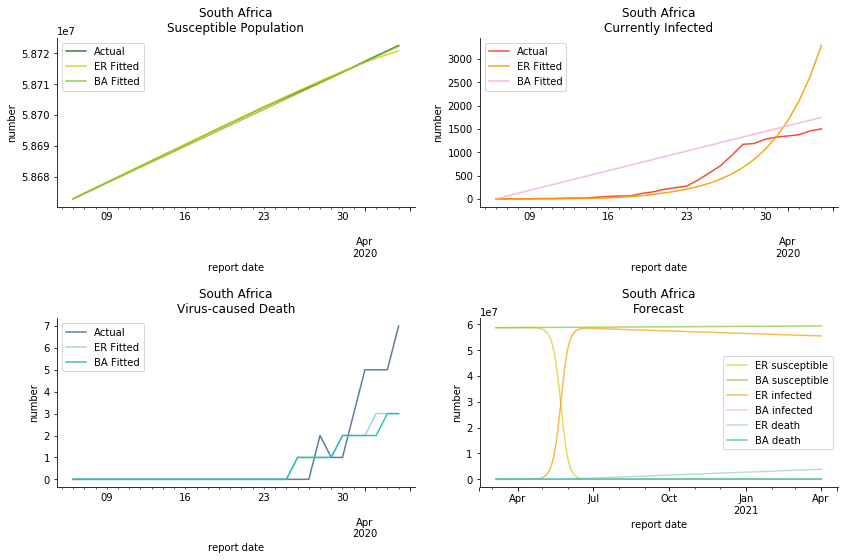

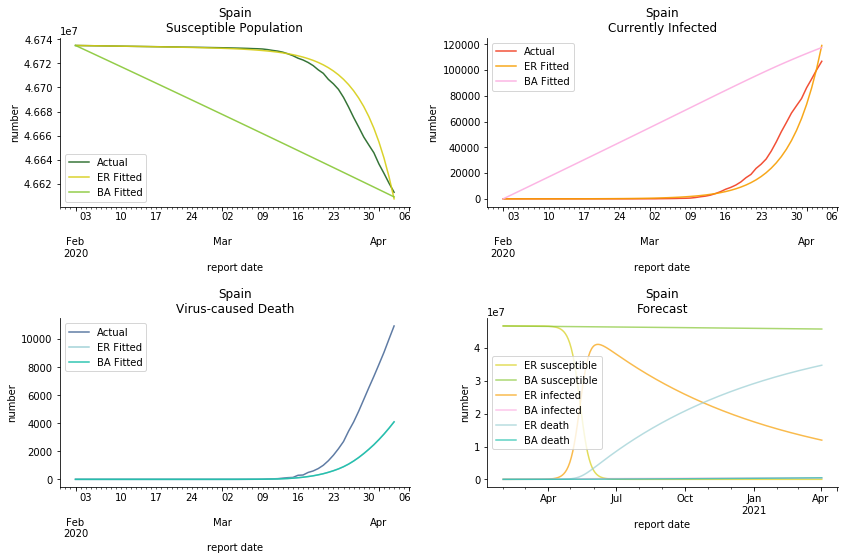

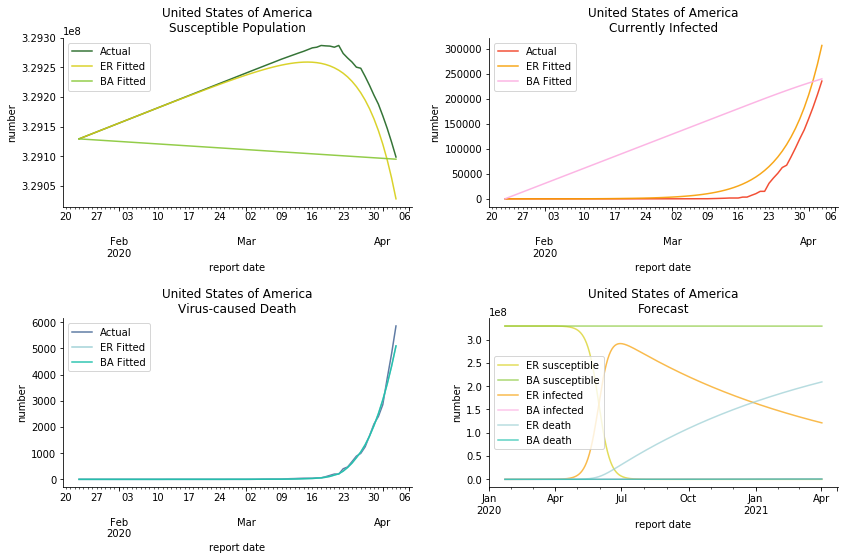

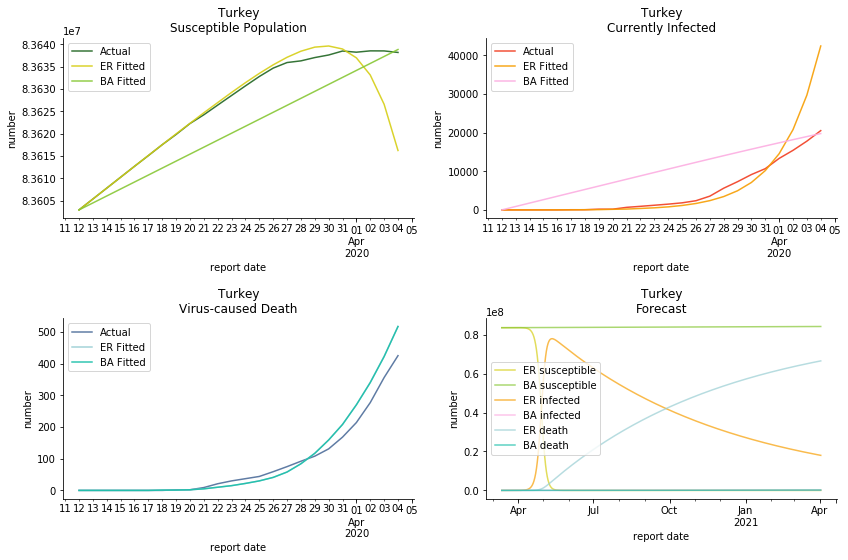

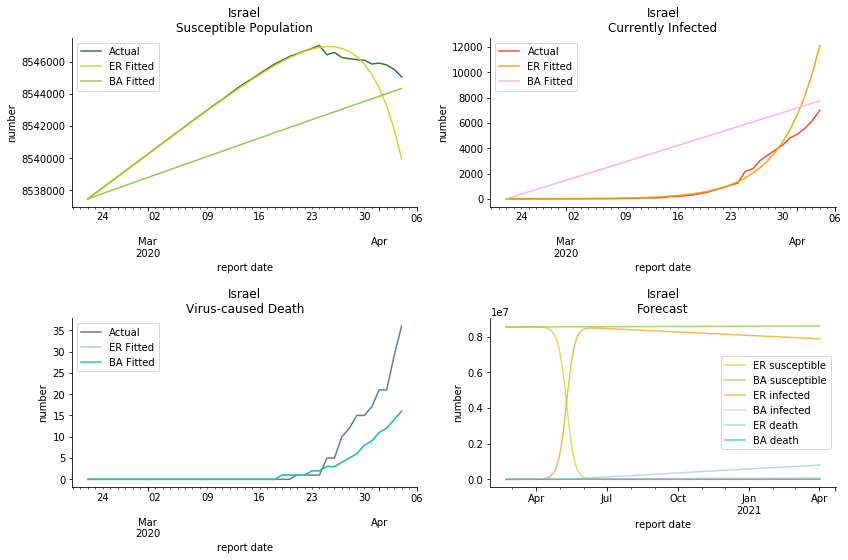

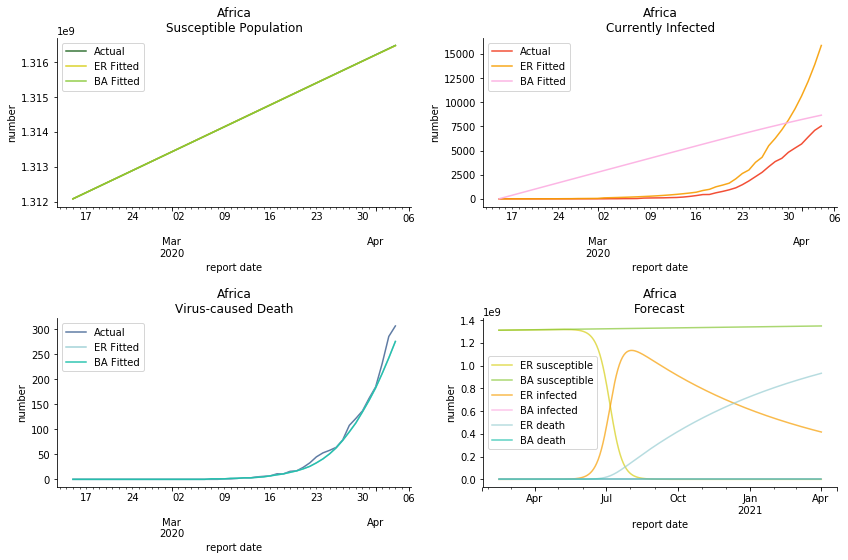

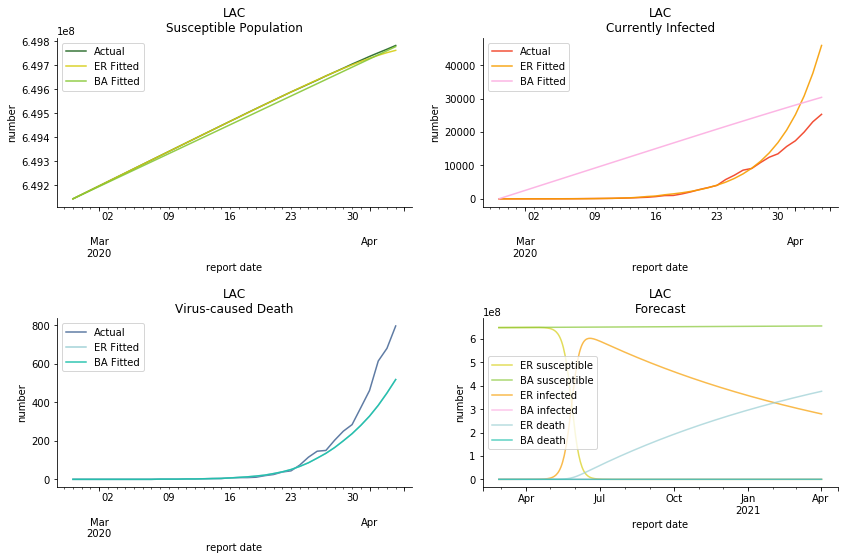

In [7]:
for i in target:    
    data=df[df['country']==i]
    plot_all(data,savefig=True)